# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data & import all the necessary modules
import pickle
import numpy as np
import csv
import cv2
import os
import time
from tqdm import tqdm

# Fill this in based on where you saved the training and testing data

training_file = "/home/dani/SDC/CarND-Traffic-Sign-Classifier-Project/train.p"
testing_file = "/home/dani/SDC/CarND-Traffic-Sign-Classifier-Project/test.p"

# Fill this in based on where you saved the training and testing data

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len (X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))
m_classes, n_classes_count = np.unique(y_train, return_counts=True)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(n_classes_count)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
[ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
# make matplot online figs bigger

# load names from csv file
sign_names ={}
with open('signnames.csv') as filehandler:
    rows = csv.reader(filehandler, delimiter=',')
    next (rows, None) #skip headers
    for row in rows:
        sign_names[str(row[0])] = row[1]
    print (sign_names)

{'31': 'Wild animals crossing', '10': 'No passing for vehicles over 3.5 metric tons', '32': 'End of all speed and passing limits', '24': 'Road narrows on the right', '34': 'Turn left ahead', '17': 'No entry', '23': 'Slippery road', '15': 'No vehicles', '30': 'Beware of ice/snow', '21': 'Double curve', '3': 'Speed limit (60km/h)', '36': 'Go straight or right', '27': 'Pedestrians', '22': 'Bumpy road', '14': 'Stop', '26': 'Traffic signals', '35': 'Ahead only', '16': 'Vehicles over 3.5 metric tons prohibited', '9': 'No passing', '19': 'Dangerous curve to the left', '13': 'Yield', '42': 'End of no passing by vehicles over 3.5 metric tons', '20': 'Dangerous curve to the right', '39': 'Keep left', '25': 'Road work', '1': 'Speed limit (30km/h)', '11': 'Right-of-way at the next intersection', '2': 'Speed limit (50km/h)', '8': 'Speed limit (120km/h)', '0': 'Speed limit (20km/h)', '7': 'Speed limit (100km/h)', '33': 'Turn right ahead', '37': 'Go straight or left', '38': 'Keep right', '5': 'Speed 

In [4]:
def plot_frequency(xlabel, xs, with_names=True):
    # get count number for each class (ys)
    m_classes, ys = np.unique(y_train, return_counts=True)
    fig, ax = plt.subplots(figsize=(15, 12))
    # create bars for each class(xs) and their respective value (ys)
    bars = ax.barh(xs, ys, 1, color='#d62a69', alpha=0.9, edgecolor='k')
    # Print list on the side and class number and count at the end of the bar
    for i,bar in enumerate(bars):
        height = bar.get_y()
        if with_names:
            ax.text(bars[-1].get_width()-(bars[0].get_width()*1)-1200, height,
                '{} - {}'.format(i, xlabel[i]),rotation=0,ha='left', va='center')
        ax.text(bars[i].get_x()+bars[i].get_width()+10, height+bars[i].get_height()/2,
                '({} - {})'.format(i, ys[i]),rotation=0,ha='left', va='center')

    plt.show()

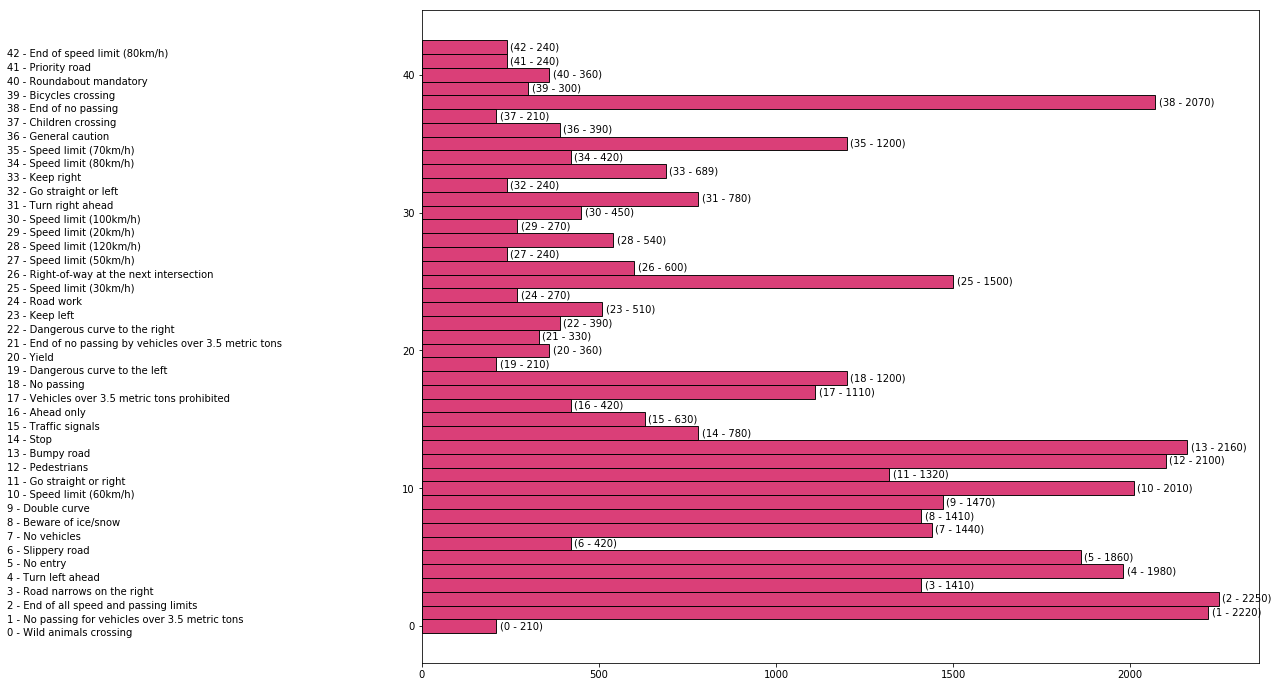

In [5]:
plot_frequency(list(sign_names.values()), np.array(list(set(y_train))))

In [6]:
def plot_tsigns(imgs, labels, names, cmap='brg', random=True):
    # This fn plots a matrix of images of traffic signs with class name and class count
    
    plt.rcParams['figure.figsize'] = (10, 10)
    # adjust fn for grayscale imgs automatically
    if len(imgs.shape) == 4 and imgs.shape[3]==1:
        imgs = np.reshape(imgs,[-1,32,32])
        cmap = 'gray'
    nrows = 6
    ncols = 7
    counter = 0
    m_classes, counts = np.unique(y_train, return_counts=True)
    if random == True:
        rand_signs = np.random.randint(0,len(imgs),[nrows*ncols])
    else:
        rand_signs = range(len(imgs))
    for row in range(nrows):
        for col in range(ncols):
            if counter <= len(imgs):
                ax = plt.subplot(nrows,ncols,counter+1)
                plt.imshow(imgs[rand_signs[counter]], cmap=cmap)
                ax.set_xticks([])
                ax.set_yticks([])
                m_name = 'Class: ' + str(labels[rand_signs[counter]])
                ax.set_title(m_name)
                m_count = '# = '+ str(counts[labels[rand_signs[counter]]])
                ax.set_xlabel(m_count)
                plt.subplots_adjust(hspace=0.4, wspace=0.4)
                counter +=1
    plt.show()

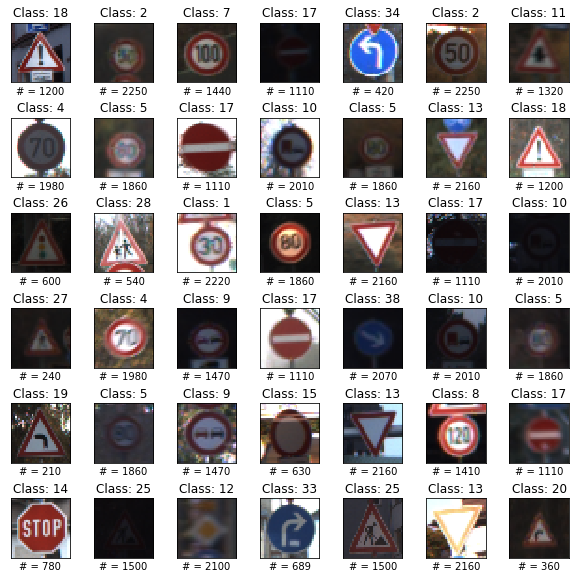

In [7]:
plot_tsigns(X_train, y_train, sign_names, cmap='brg', random=True)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
def transform_image(img,ang_range,shear_range,trans_range):
    # This fn modifies the input image with random values for rotation, translation and shear using OpenCV fns
    
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
        
    return img

In [9]:
def gen_extra_data (img_data, labels_data, target_img_num = 3000, ang_range = 20, aff_range = 10, tr_range= 10):
    # Fn to create balanced augmented data. Each class will have a minimum number of images (target_img_num)
    # The new images will be generated by rotating, translating and shearing the original images
    print (img_data.shape)
    
    max_num_iters_float = (target_img_num/np.min(n_classes_count))
    max_num_iters_per_image =  np.int(np.ceil(max_num_iters_float)) 
    
    # generate balanced data
    n_imgs_to_gen = target_img_num - n_classes_count
    # generate unbalanced data
    #n_imgs_to_gen = 5 * n_classes_count
    
    # use lists instead of np arrays just for commodity purpose (append fn)
    n_train = (len(img_data))
    img_data = list(img_data)
    labels_data = list(labels_data)
    # list to store labels completed (target_img_num reached) so far
    complete_labels = []
    # create progress bar
    pbar = tqdm(total=n_classes)
    
    for i in range (n_train):
        if n_imgs_to_gen[labels_data[i]] > 0:
            for j in range(max_num_iters_per_image):
                if n_imgs_to_gen[labels_data[i]] > 0:
                    img_data.append(transform_image(img_data[i], ang_range,aff_range,tr_range))
                    labels_data.append(labels_data[i])
                    n_imgs_to_gen[labels_data[i]] -= 1
        else:
            if labels_data[i] not in complete_labels:
                complete_labels = np.append(complete_labels, labels_data[i])
                # update progress bar
                pbar.update(1)
                
    # convert lists to np arrays so the output data is consistent with the input data    
    img_data_np = np.array(img_data)
    labels_data_np = np.array(labels_data)
    return img_data_np, labels_data_np

In [10]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# Convert img to grayscale
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# data normalization between 0.1 and 0.9 instead of 0 to 255    
def normalize(data):
    return data / 255 * 0.8 + 0.1

# Iterates through grayscale for each image in the data
def preprocess_grayscale(data):
    gray_images = []
    for image in data:
        gray = grayscale(image)
        gray_images.append(gray)
        
    return np.array(gray_images)

In [11]:
def rnd_brightness(img_data):
    # randomizes the brightness levels on image data and clips max/min values to 255 & 0 respectively
    img_data = np.int32(img_data)
    new_imgs = list([])
    for i, img in enumerate(img_data):
        # new brightness will vary between 0.5*original brightness and 1.5*original brightness
        brightness_param = np.random.rand(1)+0.5
        new_imgs.append(img*brightness_param)
    
    new_imgs = np.array(new_imgs)
    new_imgs = np.clip(new_imgs, a_max=255, a_min=0)
    return new_imgs

In [12]:
from numpy import newaxis

print('Preprocessing training data')
# Augment original training data
X_train, y_train = gen_extra_data(X_train, y_train, target_img_num = 5600, ang_range = 15, aff_range = 5, tr_range= 5)

# Convert to grayscale and add new axis to have a consistent number of dimensions compared to RGB (N,32,32,3 vs N,32,32,1)
X_train = preprocess_grayscale(X_train)
X_train = X_train[..., newaxis]
# Add randomized variation of the brightness on the images
X_train = rnd_brightness(X_train)
# Normalize the data
X_train = normalize(X_train) 

print("New training data shape =", X_train.shape)

print('Preprocessing testing data')
#make same transformations to testing data

# Iterate through grayscale
X_test = preprocess_grayscale(X_test)
X_test = X_test[..., newaxis]

# Normalize
X_test = normalize(X_test) 

print("New test data shape =", X_test.shape)


  0%|          | 0/43 [00:00<?, ?it/s]

Preprocessing training data
(39209, 32, 32, 3)


100%|██████████| 43/43 [00:11<00:00,  3.48it/s]

New training data shape = (240800, 32, 32, 1)
Preprocessing testing data
New test data shape = (12630, 32, 32, 1)


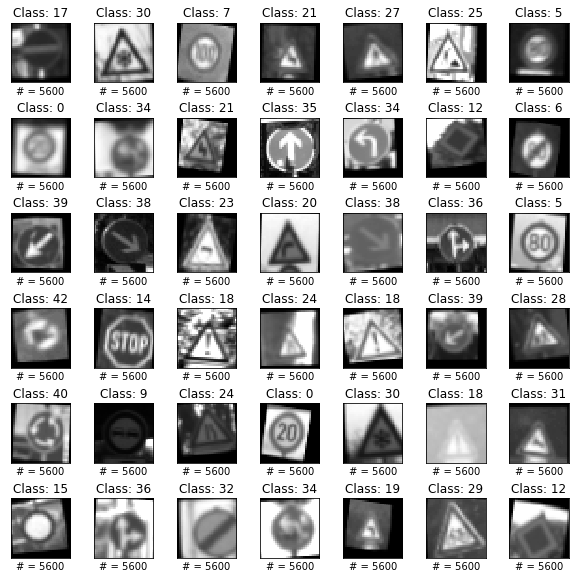

In [13]:
# Need to reshape X_train since it has now shape = (N,32,32,1) and imshow only allows (N,32,32) for grayscale imgs
plot_tsigns(np.reshape(X_train,[-1,32,32]), y_train, sign_names, cmap='gray', random=True)

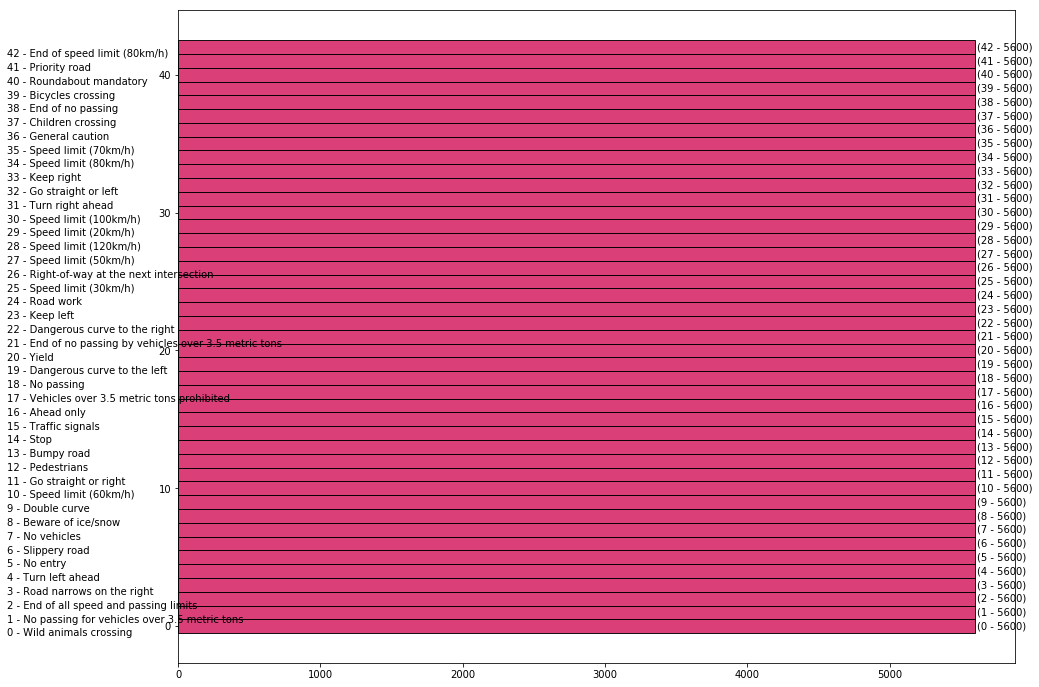

In [14]:
# Display new distribution of the training data after the data augmentation
plot_frequency(list(sign_names.values()), np.array(list(set(y_train))))

In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and validation sets

X_train, y_train = shuffle(X_train, y_train)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


print ('Training data = ',X_train.shape, y_train.shape)
print ('Validation data = ',X_validation.shape, y_validation.shape)
print ('Testing data = ',X_test.shape, y_test.shape)

Training data =  (192640, 32, 32, 1) (192640,)
Validation data =  (48160, 32, 32, 1) (48160,)
Testing data =  (12630, 32, 32, 1) (12630,)


### Model Architecture

In [16]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# set some of the hyperparameters
EPOCHS = 10
BATCH_SIZE = 128
LEARN_RATE = 0.001
REG_RATE = 0.00001
DROPOUT_KEEP_PROB = 0.7

# adapt networks automatically between RGB and grayscale images
num_channels = X_train.shape[-1]


In [17]:
### Define your architecture here.
def LeNetPlus(x):    
    #Regular LeNet network plus dropout on each layer, weight normalization and the addition of a 1x1 convolution
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    with tf.name_scope('conv1'):
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, num_channels, 6), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(6))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
        # Activation.
        conv1 = tf.nn.relu(conv1)
        # Dropout
        conv1 = tf.nn.dropout(conv1,keep_prob)
        # Pooling. Input = 28x28x6. Output = 14x14x6.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    with tf.name_scope('conv2'):
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
        # Activation.
        conv2   = tf.nn.relu(conv2)
        # Dropout
        conv2 = tf.nn.dropout(conv2,keep_prob)
        # Pooling. Input = 10x10x16. Output = 5x5x16.
        conv2   = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 3: Convolutional. Output = 5x5x64.
    with tf.name_scope('conv3'):
        conv3_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 16, 64), mean = mu, stddev = sigma))
        conv3_b = tf.Variable(tf.zeros(64))
        conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
        # Activation.
        conv3   = tf.nn.relu(conv3)
        # Dropout
        conv3   = tf.nn.dropout(conv3,keep_prob)

    # Layer 3: Fully Connected. Input = 1600. Output = 400.
    with tf.name_scope('fc1'):
        # Flatten. Input = 5x5x64. Output = 1600.
        fc0   = flatten(conv3)
        fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 400), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(400))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b
        # Activation.
        fc1   = tf.nn.relu(fc1)
        # Dropout
        fc1   = tf.nn.dropout(fc1,keep_prob)
    
    # Layer 4: Fully Connected. Input = 400. Output = 120.
    with tf.name_scope('fc2'):
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(120))
        fc2    = tf.matmul(fc1, fc2_W) + fc2_b
        # Activation.
        fc2    = tf.nn.relu(fc2)
        # Dropout
        fc2    = tf.nn.dropout(fc2,keep_prob)

    # Layer 5: Fully Connected. Input = 120. Output = 43.
    with tf.name_scope('fc3'):
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(43))
        logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Pass the weights outside the model function to calculate the regularization loss
    weights = [conv1_W, conv2_W, conv3_W, fc1_W, fc2_W, fc3_W]
    return logits, weights

In [18]:
# Create placeholders for the image and label data (adapted to RGB and grayscale)
x = tf.placeholder(tf.float32, (None, 32, 32, num_channels))
y = tf.placeholder(tf.int32, (None))
# placeholder for dropout keeping probability (need to be passed later as part of feed_dict)
keep_prob = tf.placeholder(tf.float32)
# Encode y as one_hot
one_hot_y = tf.one_hot(y, 43)

In [19]:
def regularization_cost(weights, reg_rate):
    # Calculates L2 distance and applies the regularization weight
    reg_cost = 0.0
    for weight in weights:
        reg_cost += reg_rate * tf.nn.l2_loss(weight)
    return reg_cost

In [20]:
# Select network to use
logits, weights = LeNetPlus(x)
# Calculate prediction error
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
# Calculate regularization loss to be added do the loss operation
reg_loss = regularization_cost(weights, REG_RATE)
# Calculate loss function based on the prediction error and regularization loss
loss_operation = tf.reduce_mean(cross_entropy) + reg_loss
# Define optimizer & function to optimize
optimizer = tf.train.AdamOptimizer(learning_rate = LEARN_RATE)
training_operation = optimizer.minimize(loss_operation)

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    # check network predictions against label data
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [22]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    tic_global = time.time()
    for i in range(EPOCHS):
        tic_local = time.time()
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:DROPOUT_KEEP_PROB})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}, took: {:.1f}s".format(validation_accuracy,(time.time()-tic_local)))
        print()
        
    saver.save(sess, './lenet_.ckpt')
    print("Model saved")
    print("It took {:.1f}s to train the whole model".format(time.time()-tic_global))

Training...

EPOCH 1 ...
Validation Accuracy = 0.804, took: 21.8s

EPOCH 2 ...
Validation Accuracy = 0.917, took: 20.2s

EPOCH 3 ...
Validation Accuracy = 0.941, took: 20.4s

EPOCH 4 ...
Validation Accuracy = 0.961, took: 20.1s

EPOCH 5 ...
Validation Accuracy = 0.963, took: 20.2s

EPOCH 6 ...
Validation Accuracy = 0.970, took: 20.4s

EPOCH 7 ...
Validation Accuracy = 0.973, took: 20.4s

EPOCH 8 ...
Validation Accuracy = 0.981, took: 20.1s

EPOCH 9 ...
Validation Accuracy = 0.977, took: 20.8s

EPOCH 10 ...
Validation Accuracy = 0.978, took: 21.1s

Model saved
It took 206.1s to train the whole model


In [41]:
# Calculate accuracy of predictions on test data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    #saver.save(sess, './lenetplus_gs_bal_final')


Test Accuracy = 0.924


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [24]:
# Extract images from the training data set to check if the prediction and top5 functions work properly
extract_fake_data = False
if extract_fake_data == True:
    X_train, y_train = shuffle(X_train, y_train)
    for i in range(3):
        fname = './fake_new_pictures/'+str(y_train[i])+'_'+str(i)+'.png'
        plt.imsave(fname, X_train[i], format='jpg')


In [25]:
def process_img(fname):
    # read img by img and apply some preprocessing (grayscale and dimension adjusting)
    img = mpimg.imread(fname)
    img = grayscale(img)
    img = img[..., newaxis]
    # do not apply normalization on these images, network will not work properly if done
    img = normalize(img)     
    return img

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

# If True: use of images from training data set to check that the predictions are working properly
fake_pics = False

# Load new images dataset
if fake_pics == True:
    new_pic_files = os.listdir("./fake_new_pictures/")
else:
    # Load new images
    # I decided to use more than the 5 suggested in order to increase granularity
    # This dataset contains 16 images that are part of the classes that the network has been trained for (label starts with "german_")
    # it also include 8 additional images on classes that the system has not seen before (label starts with "alt_")
    new_pic_files = os.listdir("./new_pictures/")
    
new_imgs = list([])
new_imgs_name = list([])

# Extract ground truth labels from filenames
for i, name in enumerate(new_pic_files):
    if fake_pics == True:
        new_imgs.append(process_img("./fake_new_pictures/"+name))
    else:
        new_imgs.append(process_img("./new_pictures/"+name))
    
    new_imgs_name.append(name) 
    
new_imgs = np.array(new_imgs)
new_imgs_name = np.array(new_imgs_name)
print (new_imgs.shape)
print (new_imgs_name)

(24, 32, 32, 1)
['alt_ped xing.jpg' 'german_double_curve.jpeg' 'alt_double_curve.jpg'
 'german_roadworks.jpg' 'alt_yield_sign.jpg' 'german_pref_intersection.jpg'
 'german_straight_and_left.jpg' 'german_60kmh_2.jpg' 'german_stop_2.jpg'
 'german_stop.jpg' 'german_60_kmh.jpg' 'german_stop_3.jpg'
 'german_priority_rd.jpg' 'alt_elephant_crossing_road.jpg'
 'german_turn_left.jpg' 'german_30kmh.jpg' 'alt_level_crossing.jpg'
 'german_caution.jpg' 'alt_slippery_road.jpg' 'alt_road_work.jpg'
 'german_turn_left_2.jpg' 'german_kid_zone.jpg' 'alt_iguana_crossing.jpg'
 'german_keep_right.jpg']


In [27]:
def plot_new_tsigns(imgs, names, cmap, guess=False, guesses=[]):
    # prints a matrix of the new traffic signs with the original and predicted labels
    plt.rcParams['figure.figsize'] = (12, 10)
    nrows = 4
    ncols = 6
    counter = 0
    idx_signs = range(len(imgs))
    for row in range(nrows):
        for col in range(ncols):
            if counter <len(imgs):
                ax = plt.subplot(nrows,ncols,counter+1)
                plt.imshow(imgs[idx_signs[counter]], cmap=cmap)
                ax.set_xticks([])
                ax.set_yticks([])
                m_name = names[idx_signs[counter]]
                # Reduce font size in text to fit everything into the figure without any overlap
                ax.set_title(m_name, fontsize=8)
                plt.subplots_adjust(hspace=0.4, wspace=0.4)
                if guess == True:
                    ax.set_xlabel(sign_names[str(guesses[idx_signs[counter]])], fontsize=8) 
                counter +=1
    plt.show()

### Predict the Sign Type for Each Image

In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# Find predicted label
label_pred= tf.argmax(logits, 1)
# Find top5 predicted labels
top5 = tf.nn.top_k(logits, 5)

def evaluate_new_tsign(X_data):
    # take new image data and generate predicted labels
    num_examples = len(X_data)
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        pred_label = sess.run(label_pred, feed_dict={x: batch_x, keep_prob:1})
    return pred_label

def evaluate_new_tsign_top5(X_data):
    # take new image data and generate top5 predicted labels
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        pred_label = sess.run(top5, feed_dict={x: batch_x, keep_prob:1})
    return pred_label

In [29]:
pred_labels = []
with tf.Session() as sess:
    # Restore model weights without having to run the training process
    #new_saver = tf.train.import_meta_graph('./lenetplus_rgb_bal_DOEachLayer05_reg1e5.meta')
    #new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    print("Model restored.")
    pred_labels = evaluate_new_tsign(new_imgs)
    print (pred_labels)

Model restored.
[24 21 11 25 13 11 35  5 14 14  3 40 12 40 34  1 23 18 27  0 34 25 14 38]


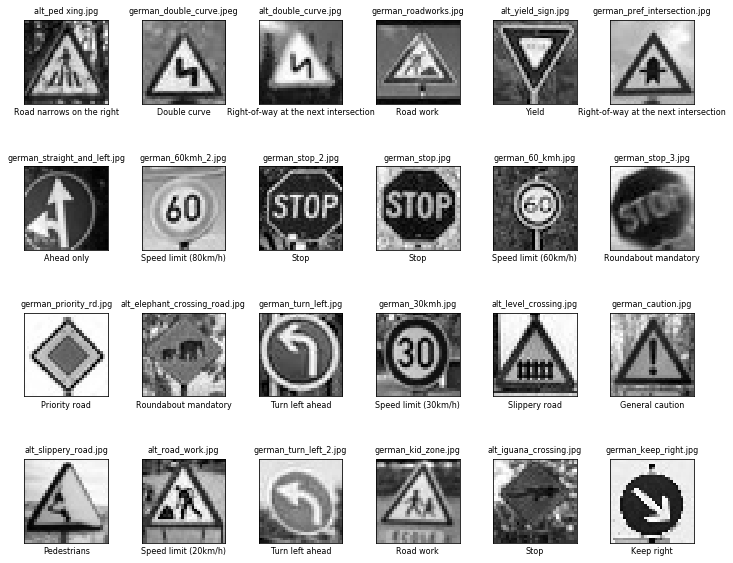

In [30]:
# print new traffic sign images with ground truth(top) and predicted label(bottom)
plot_new_tsigns(np.reshape(new_imgs,[-1,32,32]), new_imgs_name, cmap='gray', guess=True, guesses=pred_labels)

### Analyze Performance

In [35]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
pred_accuracy = 12/16*100
print (str('The accuracy of the trained network in new data is = {:.2f}%').format(pred_accuracy))

The accuracy of the trained network in new data is = 75.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [32]:
pred_labels_top5 = []
top5_results_sftmx =[]
top5_labels = []
with tf.Session() as sess:
    # get top5 values for the predicted labels for each of the new images
    
    # Restore model weights without having to run the training process    
    #new_saver = tf.train.import_meta_graph('./lenetplus_rgb_5unbal_DOEachLayer05_reg1e5.meta')
    #new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    print("Model restored.")
    pred_labels_top5 = evaluate_new_tsign_top5(new_imgs)
    top5_results_sftmx = tf.nn.softmax(pred_labels_top5[0]).eval()
    top5_results = pred_labels_top5[0]
    top5_labels = pred_labels_top5[1]

Model restored.


In [39]:
def print_tsigns_pred_top5(imgs, imgs_name, m_top5_labels, m_top5_results,  cmap='gray'):
    # plots matrix of each new image and its respective top5 labels with values
    plt.rcParams['figure.figsize'] = (4, 32)
    nrows = len(imgs)
    ncols = 2
    counter = 0
    idx_signs = range(len(imgs))
    for row in range(nrows):
        for col in range(ncols):
            if col == 0:
                ax = plt.subplot(nrows,ncols,counter+1)
                plt.imshow(imgs[idx_signs[row]], cmap=cmap)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.subplots_adjust(hspace=0.3, wspace=0.1)
            if col == 1:
                ax = plt.subplot(nrows,ncols,counter+1)
                plt.barh(6-np.arange(5),m_top5_results[row], align='center')
                for i_label in range(5):
                    plt.text(m_top5_results[row,i_label]+.02,6-i_label-.25, sign_names[str(m_top5_labels[row,i_label])])
                plt.axis('off');
                plt.text(0,6.95,imgs_name[row].split('.')[0]);    
            counter +=1
    plt.show()

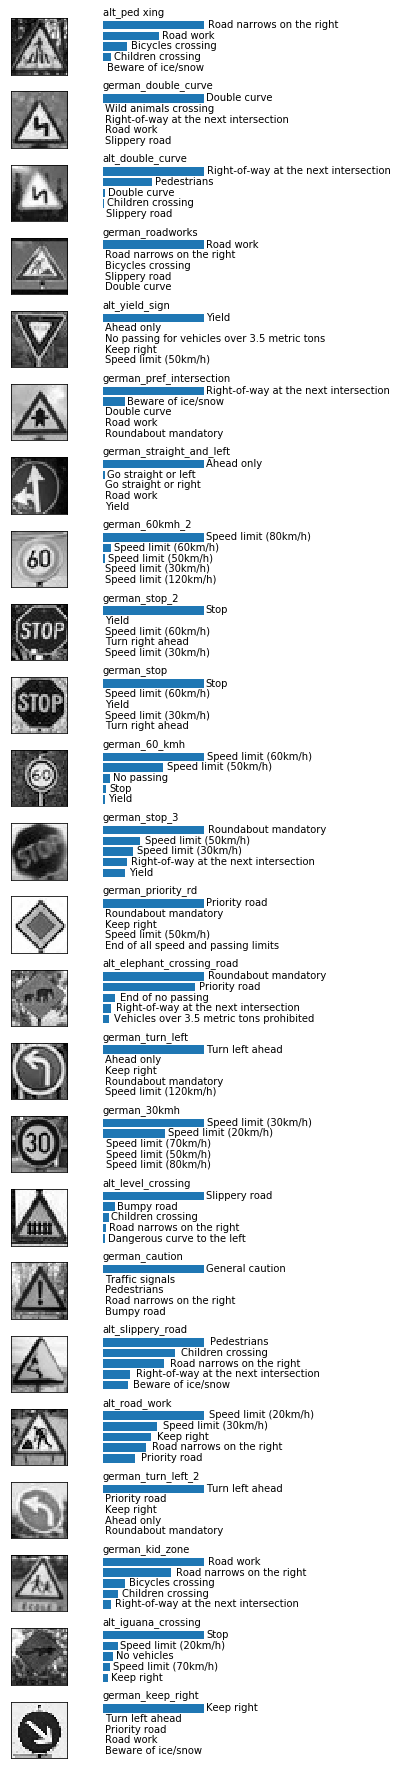

In [40]:
print_tsigns_pred_top5(np.reshape(new_imgs,[-1,32,32]), new_imgs_name, top5_labels, top5_results_sftmx,  cmap='gray')

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 